<a href="https://colab.research.google.com/github/aabarzu/Coding-Dojo/blob/main/EjercicoPredecirPreciosVivienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Montar Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True) #  force_remount=True , pide eso no sé porqué

Mounted at /content/drive


# **Importación de Librerías**

## **Librerias Panda y Visualización**

In [ ]:
import pandas as pd
from pandas.core.frame import DataFrame

import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

import missingno as msno
import numpy as np

sns.set_theme()


## **Librerias Machine Learning**

In [ ]:
# LIBRERIAS MACHINE LEARNING

from sklearn                 import metrics                # Metricas (Matriz de Confunsión)

from sklearn.linear_model    import LogisticRegression     # Regresión Logistica
from sklearn.linear_model    import LinearRegression       # Regresión Lineal

from sklearn.neighbors       import KNeighborsClassifier   # Knn como clasificador
from sklearn.neighbors       import KNeighborsRegressor    # Knn como Regresor

from sklearn.tree            import DecisionTreeClassifier # Arboles de Decisión Clasificador
from sklearn.tree            import DecisionTreeRegressor  # Arboles de Decisión Regresor

from sklearn.ensemble        import BaggingClassifier      # Bagging and pasting Classifier
from sklearn.ensemble        import BaggingRegressor       # Bagging and pasting Regressor 

from sklearn.ensemble        import RandomForestClassifier # Bosques aleatorios (Random Forests)
from sklearn.ensemble        import RandomForestRegressor  # Bosques aleatorios (Random Forests) Regres

from sklearn.model_selection import GridSearchCV           # Grid Search Cross Validation
from sklearn.model_selection import RandomizedSearchCV     # Para Pruebas Random

from sklearn.model_selection import train_test_split       # Para dividir las pruebas

from sklearn                 import tree                   # Grficar Arboles

# PARA OBTENER METRICAS

from sklearn.metrics         import mean_absolute_error    # Error absoluto medio (MAE)
from sklearn.metrics         import mean_squared_error     # Error cuadrático medio (MSE) y Raíz del error cuadrático medio (RMSE)
from sklearn.metrics         import r2_score               # Determinar el r2 score

#Transformacion de Datos scalar, normalizar y standarizacion OneHotencoding LabelEncoder 

from sklearn.preprocessing    import LabelEncoder          # Definir clasificación de una columna Texto Variables Categoricas
from sklearn.preprocessing    import StandardScaler        # Standarización de Datos
from sklearn.preprocessing    import OneHotEncoder         # OneHotEncoder 

from sklearn.linear_model     import Ridge
from sklearn.metrics          import roc_auc_score, plot_roc_curve ,accuracy_score


# **Carga de Datos**

In [ ]:
def CargaDatos(filename):
  
  extension = filename[filename.find('.')+1:]
  path = "/content/drive/MyDrive/CodingDojo/DataScience/PandasForDataManipulation/Datos/"

  filename = path + filename
  if extension.lower() == 'csv':
      df = pd.read_csv(filename)   # csv
  
  if extension.lower() == 'xlsx':
      df = pd.read_excel(filename) # Excel

  return df


In [ ]:
filename = 'kc_house_data.csv'    

df = CargaDatos(filename)

# **Información de los Datos**


In [ ]:
df.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# **Verificar Datos Nulos isna**

In [ ]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# **Verificar Datos Nulos (Null)**

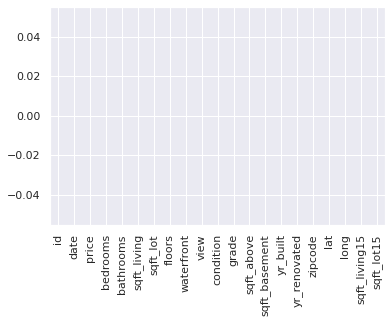

In [ ]:
df.isnull().sum().plot.bar();

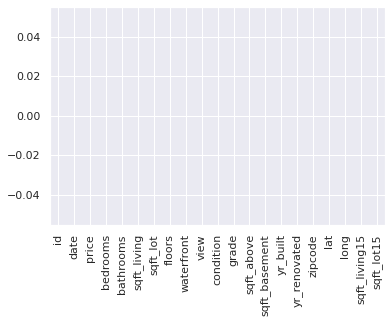

In [ ]:
df.isnull().sum().plot.bar();

# **Verificar Datos Duplicados**

In [ ]:
df.duplicated().sum()

0

# **Gráfica de Campos.** 

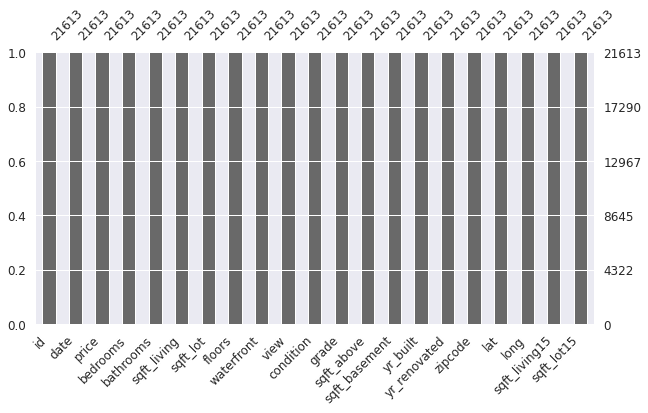

In [ ]:
msno.bar(df, figsize=(10,5), fontsize=12);

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
df.shape

(21613, 21)

## **Preparación,Análisis y Limpieza de Datos**

In [ ]:
#Muestra Datos Tipo Numericos para una columna
def ShowNumber( vpdf , vfield, Numbers = True , retornaFiltro = False):
  
  filtro = vpdf[vfield].str.isnumeric() 

  if retornaFiltro == False:
    return vpdf[filtro == Numbers]
  else:
   return  filtro 

In [ ]:
#Muestra Datos NaN para una columna
def ShowNaNdf( vpdf, vpfield, retornaFiltro = False):

  data_None = vpdf[vpfield].isna() 

  if retornaFiltro == False:
    return vpdf[data_None]
  else:
   return  data_None 

In [ ]:
#Cambia Tipo Dato de Un campo
def CambiaTipoDatoDF(vpdf ,vpfield, vptype):
  vpdf[vpfield] = vpdf[vpfield].astype(vptype) 
  return vpdf


In [ ]:
def EliminaColumnas(vpdf , vpcolumns):
  
  vpdf.drop(columns = vpcolumns , inplace = True)

  return vpdf


In [ ]:
#Elimina Filas Según Index
def EliminaFilasIndex(vpdf , indexNames):

  return vpdf.drop(indexNames)

In [ ]:
#Elimina Filas Según Filtro
def EliminaFilasCondicion(vpdf , Filtro):

  return vpdf[Filtro]

In [ ]:
def ShowDataFieldsNaN(data):
  filtro_NaN = data['NaN'] >0 
  return data[filtro_NaN]


In [ ]:
def ShowDataFieldsNoNumber(data):
  filtro_Numbers_NoNumbers = ( data['Numbers'] >0 ) &  ( data['NoNumbers'] >0  )
  return data[filtro_Numbers_NoNumbers]

In [ ]:
def ModificaDatosNaNValor(vpdf,vpfield, vpValor):

  vpdf[vpfield].fillna(vpValor)


# ***Estandarizacion de Datos***

Muestra los datos de una Columna, sirve para 
Item_Fat_Content = (array(['Low Fat', 'Regular'], dtype=object), 2) 


In [ ]:
def FuncValoresColumns(vpdf , vpfield):
  ValuesColumn = np.unique(vpdf[vpfield])
  
  return ValuesColumn , len(ValuesColumn)

In [ ]:
def FuncLabelEncoderColumn(vpdf , vpfield):
  
  # creating instance of labelencoder
  labelencoder = LabelEncoder()

  vpdf[vpfield] = labelencoder.fit_transform(vpdf[vpfield])

  return vpdf
  

In [ ]:
def FuncOneHotEncoderColumns(vpdf , vpfield):

  # creating instance of one-hot-encoder
  onehothncoder = OneHotEncoder(handle_unknown='ignore',categories='auto')

  # crea un dataframe con la nuevas columnas

  ValuesColumn , LenValuesColumn = FuncValoresColumns(vpdf , vpfield)

  ValuesColumn = [ vpfield + '_' + str(cls_label)  for cls_label in ValuesColumn ]

  enc_df = pd.DataFrame(onehothncoder.fit_transform( vpdf[[vpfield]]).toarray(), columns=ValuesColumn) 

  vpdf.drop(columns = vpfield , inplace = True)

  # Une los dos dataframe
  vpdf = vpdf.join(enc_df)
  
  return vpdf

# **Metodos de machine learning**






# **Álboles de Decisión**

## **Arbol de Decisión como Regresor**

In [ ]:
## **Arbol de Decisión como Regresor**
def MetodoArbolesDecisionRegresor(X , y , max_depth=2 ):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Divide los datos para pruebas

  #############################
  #      INICIO REGRESOR      #
  #############################

  # Creamos un objeto (una variable) a partir del regresor de árbol de decisión
  reg = DecisionTreeRegressor(max_depth=max_depth)

  # Entrenamos nuestro modelo!
  reg.fit(X_train, y_train)

  y_pred = reg.predict(X_test)

  score = reg.score(X_test, y_test)

  #############################
  #         METRICAS          #
  #############################

  print(f" max_depth   = {max_depth}")
  print(f" score       = {score}\n")

  y_predX = reg.predict(X)

  return y_pred , y_predX, score


# **Bagging and pasting**

In [ ]:
def MetodoBagginTreegRegressor(X,y,n_estimators=500,max_samples=100,bootstrap=True):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


  bag_reg = BaggingRegressor(
    DecisionTreeRegressor(), n_estimators=n_estimators,
    max_samples=max_samples, bootstrap=bootstrap
   )
  
  bag_reg.fit(X_train, y_train)
  
  y_pred = bag_reg.predict(X_test)

  score = round( bag_reg.score(X_test, y_test) , 4 )  * 100

  print(f" score = {score} n_estimators = {n_estimators} \n")  
  
  #print(y_pred)
  #print(y_test)
  #score = bag_clf.score(X_test, y_test)

  #print(f" n_estimators  = {n_estimators}")
  #print(f" max_samples   = {max_samples}")
  #print(f" bootstrap     = {bootstrap}")

  #print(f" y_pred        = {y_pred}")
  #print(f" y_test        = {y_test}")
  #print(f" score         = {score}\n")
  
  return y_pred


# **Bosques aleatorios (Random Forests)**

In [ ]:
## **Arbol de Decisión como Regresor**
def MetodoRandomForestRegressor(X , y , n_estimators=2 , random_state=0):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Divide los datos para pruebas

  #############################
  #      INICIO REGRESOR      #
  #############################

  # Creamos un objeto (una variable) a partir del regresor de árbol de decisión
  reg = RandomForestRegressor(n_estimators = n_estimators, random_state = random_state)

  # Entrenamos nuestro modelo!
  reg.fit(X_train, y_train)

  y_pred = reg.predict(X_test)

  score = reg.score(X_test, y_test)

  #############################
  #         METRICAS          #
  #############################

  print(f" n_estimators  = {n_estimators}")
  print(f" score         = {score}\n")

  y_predX = reg.predict(X)

  return y_pred , y_predX , score


# **Grid Search**

**GridSearch Random Forest Regressor**

In [ ]:
def MetodoGridSearchRandomForestRegressor(X,y , param_grid ):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  #param_grid = [  {'n_estimators':[30,100,300]} ]

  forest_reg = RandomForestRegressor()
  
  grid_search = GridSearchCV(forest_reg, param_grid, cv=5,return_train_score=True)

  grid_search.fit(X_train, y_train)

  cvres = grid_search.cv_results_
  # zip junta parámetros en dos listas como uno a uno
  for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values) # Mostramos el accuracy y el n_estimator en cada prueba de validación



 **Método Randomized SearchCV RandomForest Regressor**

In [ ]:
def MetodoRandomizedSearchCVRandomForestRegressor(X , y, param_grid):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  #param_grid = [{'n_estimators':np.arange(1,1000,1)},
  #             {'n_estimators':np.arange(1,1000,1) , 'max_depth' :np.arange(1,10,1) }               ]

  forest_reg = RandomForestRegressor()

  clf = RandomizedSearchCV(forest_reg, param_grid, random_state=42, cv=5, return_train_score=True)

  clf.fit(X_train, y_train)

  cvres = clf.cv_results_
  for values in zip(cvres['mean_test_score'], cvres['params']):
     print(values)



# **Sección Función Graficos**

**Graficar un Matriz de Confusión**



In [ ]:
def GraficoMatrizConfuncionSeab(matrix, title='Este es el title', xlabel='Este es el xlabel', ylabel='Este es el xlabel' ):

  # crear marco de datos de pandas Crear un conjunto de datos
  # class_names = Nombres de la matriz según los campos ['campo1','campo2']
  # Creo que se usa más para clasificación

  # dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

  # crear mapa de calor dibujar mapa de calor

  #sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
  

  plt.figure(figsize=(9,9))
  sns.heatmap(matrix, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
  plt.ylabel(xlabel, fontsize = 17);
  plt.xlabel(ylabel, fontsize = 17);
  plt.title(title, size = 17);
  plt.tick_params(labelsize= 15)

  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values



**Gráfico de Barras**

In [ ]:
def GraficarBarPandas( vpdf, title, xlabel, ylabel, legend ):
  
  plt.figure(dpi=200) #resolución de figura (implica tamaño)
  vpdf.plot.bar(rot=70);
  plt.legend(legend);
  plt.title(title);
  plt.xlabel(xlabel);
  plt.ylabel(ylabel);
  plt.show();

In [ ]:
def GraficarBarPlotly( vpdf,x , y, title, color):
  
  plt.figure(dpi=200) #resolución de figura (implica tamaño)
  fig = px.bar(vpdf, x=x, y=y , title=title , color=color)
  fig.show()

**Graficar un Histograma**

In [ ]:
def GraficarHistogramaMat2(vpdf , vpfield, rotation = 0): # Varios Histogramas
    
  data_dog = df['Percentage of Dog Owners']
  data_cat = df['Percentage of Cat Owners']

  fig1 = plt.figure(dpi=100)
  
  ax1  = fig1.add_subplot(1,1,1)
  ax2  = fig1.add_subplot(1,1,1)

  ax1.hist(data_dog.values , edgecolor='black' ,linewidth = 0.5 )
  ax2.hist(data_cat.values , edgecolor='black', linewidth = 0.5 ,alpha = 0.8)
  
  plt.legend(labels=['Dogs', 'Cats'])

  plt.ylabel("Count")
  plt.xlabel("Percentage of Animal Owners")
  plt.xticks(rotation = rotation)

  #plt.style.use('classic')
  plt.grid();
  plt.show();


In [ ]:
def GraficarHistogramaPandas(vpdf , vpfield, bins = 5 , rotation = 45):

  plt.style.use('seaborn')
  plt.xticks(rotation = 45)
  plt.ticklabel_format(useOffset=False, style='plain')  

  vpdf[vpfield].hist(bins = bins,edgecolor='black');

In [ ]:
def GraficarHistogramaPloty(vpdf , vpxfield, nbins = 5 ):

  fig = px.histogram(vpdf, x=vpxfield , nbins=nbins )
  fig.show();

### **Diagramas de caja**

**Diagramas de caja  Pandas** 

In [ ]:
def GraficarDiagramaBoxplotPandas(columnas,labels,notch=False):

  df.boxplot(columnas, labels=labels); #column = 'area_mean', by = 'diagnosis''
  plt.title('');
  plt.suptitle('');



**Diagramas de caja matplotlib** 

In [ ]:
def GraficarDiagramaboxplotMat(vpdf, columnas,labels,notch=False):

  fig, axes = plt.subplots(nrows = 1, ncols = 1)
  axes.boxplot(columnas, labels=labels, notch=notch);


**Diagramas de caja Seaborn**

In [ ]:
def GraficarDiagramaBoxplotSeaborn( vpdf, x, y):
  
  sns.boxplot(data=vpdf , x=x, y=y );


**Diagramas de caja plotly Express**


In [ ]:
def GraficarDiagramaboxPlotly( vpdf, x, y , color):

  fig = px.box(df, x=x, y=y , color=color)  #color columnas que voy a graficar en este caso eje x  x e y es 
  fig.show()

# **Diagramas de Pie (Torta)**

In [ ]:
def GraficarDiagramaPiePandas( vpdf):

  vpdf.pie(  autopct="%0.1f %%")


In [ ]:
def GraficarDiagramaPieMat( vpdf, labels, startangle = 90 , shadow = True , title = ""):
  
  plt.pie(vpdf, labels=labels , autopct="%0.1f %%" , startangle = startangle, shadow=shadow)
  plt.legend(title= title)
  plt.show()
  

In [ ]:
def GraficarDiagramaPiePlotly( datos, values=None , names = None , title =None):
  
  #Esta cosa solo recibe dataframe  creo
  #values= campo a graficar
  #name  para el label que aparece al lado

  fig = px.pie(datos, values = values, names=names , title = title)
  fig.show()

# **Grafica de dispersión**

In [ ]:
def GraficarDiagramaScatterMat( x, y , label=None):
  
  #Esta cosa solo recibe dataframe  
  #values= campo a graficar
  #name  para el label que aparece al lado

  #scatter(x_axis_data, y_axis_data, s = None, c = None, marker = None, cmap = None, vmin = None, vmax = None, alpha = None, linewidths = None, edgecolors = None)

  fig = plt.scatter(x=x, y=y, marker='o' , label=label)
  fig.show()

In [ ]:
def GraficarDiagramaScatterPlotly( vpdf, x, y):
  
  # x and y given as array_like objects 

  import plotly.express as px
  fig = px.scatter(vpdf, x=x, y=y)
  fig.show();

# **Grafica Matriz Correlación**

In [ ]:
def GraficaMatrizCorrelacion(vpdf , sizex=8, sizey=8, by=None,ascending=False):
  
  #by=['price']
  f, ax = plt.subplots(figsize=(sizex, sizey))
  
  if by == None:
    correlation_mat = vpdf.corr()
  else:
    correlation_mat = vpdf.corr().sort_values(by=by, ascending=ascending)  
    
  sns.heatmap(correlation_mat, annot = True , linewidths=.5, ax=ax );


### **Graficar un Árbol**

In [ ]:
def MetodoGraficarTree(tree_clf,columns,class_names ):
  
  #############################
  #      GRAFICAR ARBOL       #
  #############################
  
  plt.figure(figsize=(20,20))
  
  tree.plot_tree(tree_clf,
    feature_names = columns,
    class_names   = class_names,
    rounded       = True,
    filled        = True );


## **Calculos Sensibilidad, Especificidad, Precisión, Type 1 Error Rate, Type 2 Error Rate**


In [ ]:
def CalculosVarios(tn, fp, fn, tp):
  
  # Calcular sensibilidad, especificidad, Precisión , Type 1 Error Rate, Type 2 Error Rate
  
  sensitivity =  tp/ (tp + fn)
  specificity =  tn / (tn + fp)
  precision   =  tp /(tp + fp)
  score       =  (tn + tp) / (tn + tp + fn + fp)
  
  print('Sensitivity: {:.3f}'.format(sensitivity))
  print('Specificity: {:.3f}'.format(specificity))
  print('Precisión: {:.3f}'.format(precision))
  print('Score: {:.5f}'.format(score))

  # especificidad: tasa negativa verdadera
  # Tasa de falsos positivos (FPR) = 1 - especificidad
  # También conocido como error tipo 1

  type_one_error = 1 - specificity

  # sensibilidad: tasa de verdaderos positivos
  # Tasa de falsos negativos (FOR) = 1 - sensibilidad
  # También conocido como error tipo 2

  type_two_error = 1 - sensitivity
  print('Type 1 Error Rate: {:.3f}'.format(type_one_error))
  print('Type 2 Error Rate: {:.3f}'.format(type_two_error))

  return sensitivity , specificity , precision , type_one_error  , type_two_error , score


# **Funciones Análisis de Campos**

In [ ]:
def Analisifield(df,column):
 
  data = pd.DataFrame([{ 'Field':'','Numbers':0, 'NoNumbers':0 ,'NaN':0, 'NaN%':0,'TotalRows':0 ,'dtypes':'','Length':0 }])
  
  data['Field']      = column
 
  try:
    df[column].count()
  except:
    return data  

  data['dtypes'] = df[column].dtypes
  try:

    if df[column].dtypes == object:

      filtro = df[column].str.isnumeric()
      
      data['Numbers']    = df[filtro==True][column].count()
      data['NoNumbers'] = df[filtro==False][column].count()
      data['Length'] = df[column].str.len()
    else:
      data['Numbers']    = df[column].count()

  except:
    
    data['NoNumbers'] = df[column].count()

  try:
    data['NaN']  =  df[column].isna().sum()
    data['NaN%'] =  df[column].isna().sum()/df.shape[0]*100
  except:
    data['NaN'] = 0

  data['TotalRows'] = data['Numbers'] + data['NoNumbers'] + data['NaN'] 
  
  return data

In [ ]:
def AnalizaDataFrame(df_):

  data = pd.DataFrame(columns=['Field','Numbers','NoNumbers','NaN','NaN%','dtypes'])

  for column in df_.columns:
    data =pd.concat([data,Analisifield(df,column)]) 
  data.reset_index(inplace =True,drop=True)
  return data


In [ ]:
data = AnalizaDataFrame(df)
data

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length
0,id,21613,0,0,0.0,int64,21613.0,0.0
1,date,0,21613,0,0.0,object,21613.0,15.0
2,price,21613,0,0,0.0,float64,21613.0,0.0
3,bedrooms,21613,0,0,0.0,int64,21613.0,0.0
4,bathrooms,21613,0,0,0.0,float64,21613.0,0.0
5,sqft_living,21613,0,0,0.0,int64,21613.0,0.0
6,sqft_lot,21613,0,0,0.0,int64,21613.0,0.0
7,floors,21613,0,0,0.0,float64,21613.0,0.0
8,waterfront,21613,0,0,0.0,int64,21613.0,0.0
9,view,21613,0,0,0.0,int64,21613.0,0.0


In [ ]:
ShowDataFieldsNoNumber(data)

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length


In [ ]:
ShowDataFieldsNaN(data)

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length


# **Proceso depuración Datos**


## **Datos no number**

In [ ]:
cont = 0
contador_datos = 0

for index in data.index:
  if data['Numbers'][index] >0 and data['NoNumbers'][index] >0:
    contador_datos += 1
    df_NoNumber =  ShowNumber(df ,data['Field'][index], False ) 
    
    #print(f"index = {index} data['Field'][index] = {data['Field'][index]} data['NoNumbers'][index] = {data['NoNumbers'][index]} ")
    
    print(f" field = '{data['Field'][index]}' ")
    
    if cont == 0:
      df_NoNumber = ( ShowNumber(df ,data['Field'][index], False ) )
    else:
      df_NoNumber = pd.merge( df_NoNumber , (ShowNumber(df ,data['Field'][index], False ))  )
    
    cont += 1

if contador_datos>0:
  df_NoNumber

### **Variables para Procesos de datos**

In [ ]:
#Habilitar Estas variables para realizar una acción

bEliminaColumnaNaN = False
bEliminaFilasNaN   = False

bCambiaTipoDato    = False
bActualizaColumna  = False



# **Actualiza una fila especifica**

In [ ]:
if bActualizaColumna == True:
  
  filtro = ShowNumber(df ,'<Campo a Actualizar>', False, True )
  df.loc[ filtro == False  , ['<Campo a Actualizar>']] = 27 #Valor a reemplazar Numerico ó No
  df[filtro == False]


# **Cambiando TipoDato de Columna**

In [ ]:
if bCambiaTipoDato == True:
  df = CambiaTipoDatoDF(df , '<campo>' , 'int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# **Campos NaN**

In [ ]:
#Filtro por los errores en los datos
ShowDataFieldsNaN(data)

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length


In [ ]:
#def ShowNaNdf( vpdf, vpfield, retornaFiltro = False):
cont = 0
contador_datos = 0

for index in data.index:
  
  if data['NaN'][index] >0:
    
    #print(f"index = {index} data['Field'][index] = {data['Field'][index]} data['NoNumbers'][index] = {data['NoNumbers'][index]} ")
    
    #print(f" field = '{data['Field'][index]}' ")
    if cont == 0:
      
      #print(f"Ciclo ={cont} field = '{data['Field'][index]}' ")
      df_NaNdf = ( ShowNaNdf(df ,data['Field'][index] ) )
      #print(df_NaNdf)
    else:
      #print(f"Ciclo ={cont}  merge field = '{data['Field'][index]}' ")
      df_NaNdf_aux = ShowNaNdf(df ,data['Field'][index])
      #print(df_NaNdf_aux)
      df_NaNdf = pd.merge( df_NaNdf , df_NaNdf_aux , how='outer')  
      contador_datos += 1
    
    cont += 1

if contador_datos > 0 :
  df_NaNdf

# **Eliminando Filas NaN**

In [ ]:
if bEliminaFilasNaN == True:
  columns = [] # Colocar nombre de los campos  a eliminar filas entre comillas y separado por coma ['Campo1','Campo2']
  for column in columns:
    print(f"row = {column}")
    filtro_NaN = ShowNaNdf(df ,column, True)
    df = df[~filtro_NaN]

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# **Elimina una o varias columnas**

In [ ]:
if bEliminaColumnaNaN == True:
  columns = [] # Colocar las columnas a eliminar entre comillas ''
  for column in columns:
    print(f"column = {column}")
    EliminaColumnas(df,column) 

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# **Manejo de Datos Duplicados**

In [ ]:
data_duplicated = df.duplicated()
df[data_duplicated]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


# **Elimina Duplicados**

In [ ]:
df.drop_duplicates(inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
data = AnalizaDataFrame(df)
data

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length
0,id,21613,0,0,0.0,int64,21613.0,0.0
1,date,0,21613,0,0.0,object,21613.0,15.0
2,price,21613,0,0,0.0,float64,21613.0,0.0
3,bedrooms,21613,0,0,0.0,int64,21613.0,0.0
4,bathrooms,21613,0,0,0.0,float64,21613.0,0.0
5,sqft_living,21613,0,0,0.0,int64,21613.0,0.0
6,sqft_lot,21613,0,0,0.0,int64,21613.0,0.0
7,floors,21613,0,0,0.0,float64,21613.0,0.0
8,waterfront,21613,0,0,0.0,int64,21613.0,0.0
9,view,21613,0,0,0.0,int64,21613.0,0.0


In [ ]:
ShowDataFieldsNoNumber(data)

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length


In [ ]:
ShowDataFieldsNaN(data)

,Field,Numbers,NoNumbers,NaN,NaN%,dtypes,TotalRows,Length


In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# **Siempre Reinicar Indice después de borrar filas antes**

In [ ]:
# Reseteando Indices por haber eliminado campos anteriormente
df.reset_index(inplace=True, drop=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# **Graficar Matriz de Correlación**

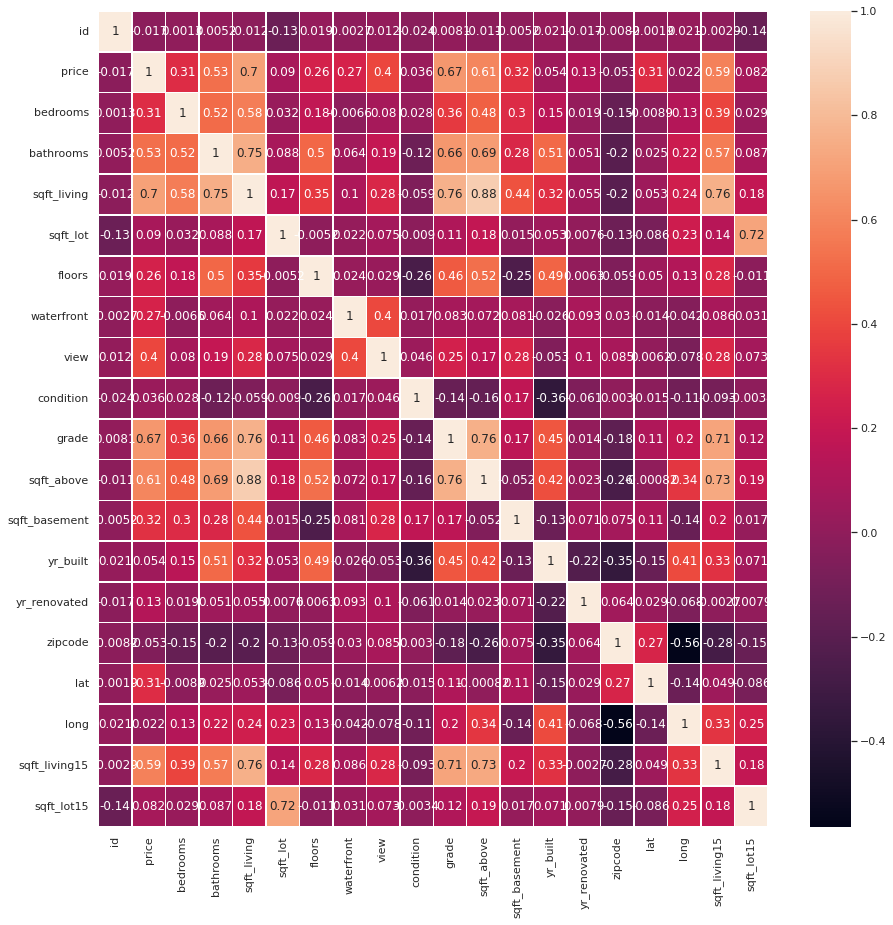

In [ ]:
GraficaMatrizCorrelacion( df, 15,15 )

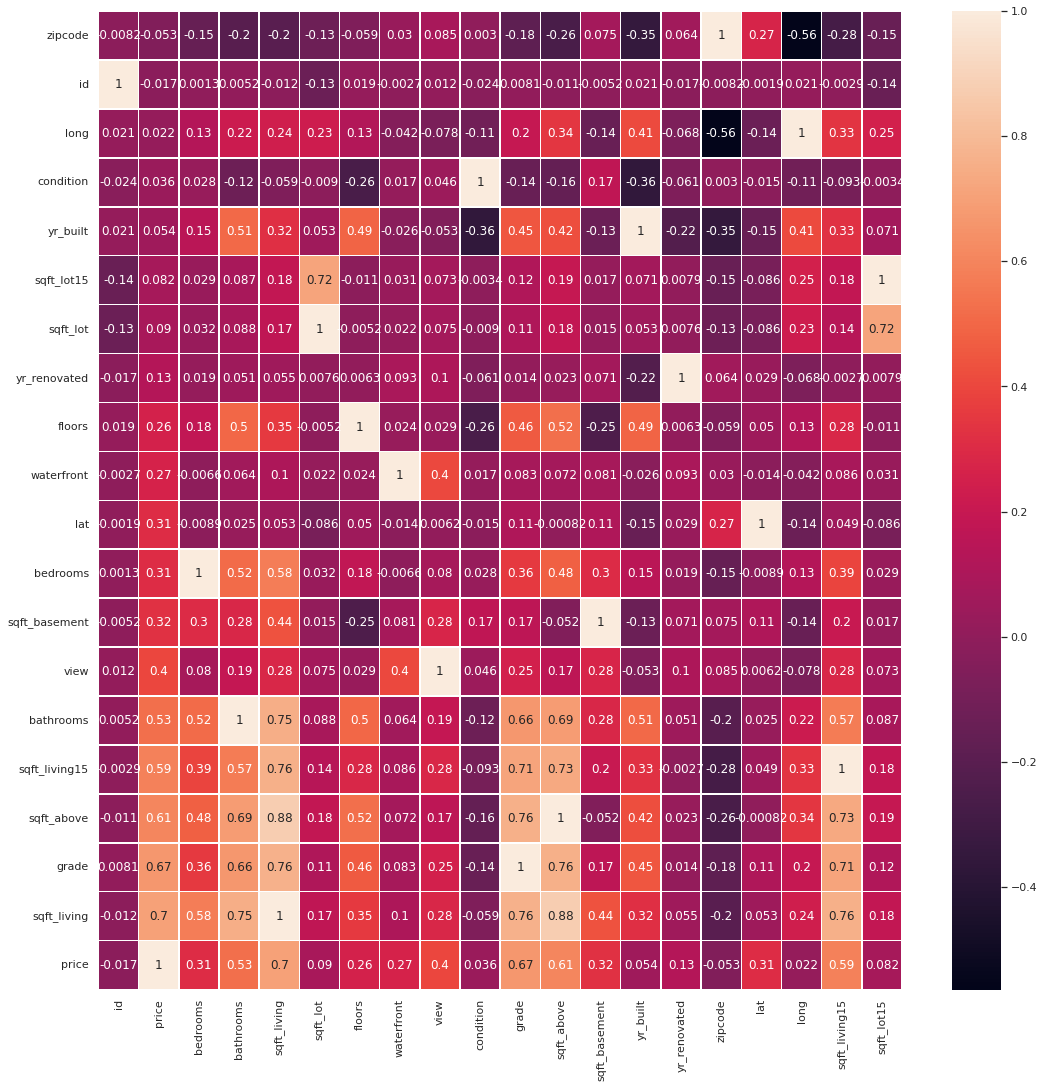

In [ ]:
GraficaMatrizCorrelacion( df, 18,18,'price',True)

In [ ]:
sortby="price"
df.corr()[sortby].sort_values(ascending=False)


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

df.descripbe().T

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# **Filtrado de Datos**

In [ ]:
# Filtrado de DataFrame

#Condiciones
#filtro_datos_1 = df['Campo1'] == '<CONDICICION>'
#filtro_datos_2 = df['Campo1'] == '<CONDICICION>'

#Filtro final con las condiciones
#filtro_final = ( filtro_datos_1 & filtro_datos_1 )

#df_valores = df[filtro_final] 

df_valores = df.copy()


**Cambiar los campos tipo fecha a Numeros , los modelos siempre tabrajan mejor con números, Usar LabelEncoder , OneHotEncoder**

In [ ]:
#df_valores['Sex'] = df_valores.Sex.map({'M': 0,'F': 1, 'I':2})
#df_valores['Sex'] = df_valores['Sex'].map({'M': 0,'F': 1, 'I':2})
#df

#df_valores['year']  = df_valores['date'].str[0:4]
#df_valores['month'] = df_valores['date'].str[4:6]
#df_valores['day']   = df_valores['date'].str[6:8]
df_valores['date'] = pd.to_datetime(df_valores['date'].str[0:4] + df_valores['date'].str[4:6] + df_valores['date'].str[6:8], format='%Y%m%d', errors='ignore') 

#for campo in ['year','month','day']:
#  df_valores = CambiaTipoDatoDF(df_valores , campo  , 'int64')

df_valores

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df_valores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [ ]:
sortby="price"
df_valores.corr()[sortby].sort_values(ascending=False) * 100

price            100.000000
sqft_living       70.203505
grade             66.743426
sqft_above        60.556730
sqft_living15     58.537890
bathrooms         52.513751
view              39.729349
sqft_basement     32.381602
bedrooms          30.834960
lat               30.700348
waterfront        26.636943
floors            25.679389
yr_renovated      12.643379
sqft_lot           8.966086
sqft_lot15         8.244715
yr_built           5.401153
condition          3.636179
long               2.162624
id                -1.676220
zipcode           -5.320285
Name: price, dtype: float64

In [ ]:
#FuncValoresColumns
for column in []:
  print(f"{column} = {FuncValoresColumns(df_valores, column)} \n")

In [ ]:
#LabelEncoder  
for column in []:
  df_valores = FuncLabelEncoderColumn (df_valores , column)

df_valores

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#FuncOneHotEncoderColumns 
for column in []:
  df_valores = FuncOneHotEncoderColumns (df_valores , column)
df_valores  


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# **Gráfico inicial**


In [ ]:
# **Gráfico inicial**
#

**Obtención de Datos X e y**

In [ ]:
df_valores

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**Elimina columnas de df_valores**

In [ ]:
for column in []:  # Lista de Columnas a Eliminar Ejemplo ['Columna1' , 'Columna2' ]
  df_valores= EliminaColumnas(df_valores,column)

In [ ]:
# values los deja como arreglo , pero se pueden usar los dataframe Directos, pero existen librerias que solo usan array numpys

# Forma 1 cuando son pocas columnas para el loc
#X = df_valores.loc[:, ['campo1','campo2','campo3','campo4']]    #.values

# Forma 2 cuando debo eliminar pocas columnas y deben quedar muchas columnas en el data frame
X = df_valores.drop(columns=['id','date','zipcode','price']).values 

# Forma 3 Parecido a parte 1 , en el loc se podría usar un filtro. Ojo
#X = df_valores[['campo1','campo2','campo3','campo4']]  #.values

X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [ ]:
X.shape

(21613, 17)

In [ ]:
y = df_valores['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [ ]:
y.shape

(21613,)

# **Aplicación del Algún método**


In [ ]:
for max_depth in range(1, 30, 1):
  MetodoArbolesDecisionRegresor(X , y , max_depth )

 max_depth   = 1
 score       = 0.3073915429867434

 max_depth   = 2
 score       = 0.47782156177669766

 max_depth   = 3
 score       = 0.5503419953442384

 max_depth   = 4
 score       = 0.6068088317286765

 max_depth   = 5
 score       = 0.6642350330800619

 max_depth   = 6
 score       = 0.7290593548153976

 max_depth   = 7
 score       = 0.7554227143821957

 max_depth   = 8
 score       = 0.7582908476137186

 max_depth   = 9
 score       = 0.7642548213807067

 max_depth   = 10
 score       = 0.7474760223639899

 max_depth   = 11
 score       = 0.7678950411702413

 max_depth   = 12
 score       = 0.7575954175463089

 max_depth   = 13
 score       = 0.7642587204861905

 max_depth   = 14
 score       = 0.7560552039000363

 max_depth   = 15
 score       = 0.750565983841002

 max_depth   = 16
 score       = 0.7375563919758483

 max_depth   = 17
 score       = 0.7352254946490295

 max_depth   = 18
 score       = 0.736756000318019

 max_depth   = 19
 score       = 0.7320664235106589

 ma

In [ ]:
for n_estimators in range(100,1000, 100):
  MetodoBagginTreegRegressor(X,y,n_estimators,100,True)

 score = 67.88 n_estimators = 100 

 score = 68.82000000000001 n_estimators = 200 

 score = 70.0 n_estimators = 300 

 score = 68.91000000000001 n_estimators = 400 

 score = 68.87 n_estimators = 500 

 score = 68.82000000000001 n_estimators = 600 

 score = 69.27 n_estimators = 700 

 score = 68.88 n_estimators = 800 

 score = 68.67999999999999 n_estimators = 900 



In [ ]:
for n_estimators in range(1,100, 1):
  MetodoRandomForestRegressor(X,y,n_estimators,42)

 n_estimators  = 1
 score         = 0.6816673513938236

 n_estimators  = 2
 score         = 0.7667609621516477

 n_estimators  = 3
 score         = 0.799281845856711

 n_estimators  = 4
 score         = 0.8103691138706032

 n_estimators  = 5
 score         = 0.8116907823444407

 n_estimators  = 6
 score         = 0.8235343018053944

 n_estimators  = 7
 score         = 0.8265605665462895

 n_estimators  = 8
 score         = 0.8330524151473663

 n_estimators  = 9
 score         = 0.8340109553568597

 n_estimators  = 10
 score         = 0.8363099042085236

 n_estimators  = 11
 score         = 0.8410899162967073

 n_estimators  = 12
 score         = 0.8450239895262367

 n_estimators  = 13
 score         = 0.8460697407590385

 n_estimators  = 14
 score         = 0.8464757560814768

 n_estimators  = 15
 score         = 0.8467637330627397

 n_estimators  = 16
 score         = 0.8458368938866119

 n_estimators  = 17
 score         = 0.8472498098919788

 n_estimators  = 18
 score         = 0.84

In [ ]:
#def MetodoGridSearchRandomForestRegressor(X,y , param_grid ):

param_grid = [{'n_estimators':[30,100,300]},
             {'n_estimators':[30,100,300] , 'max_depth' :[10,20,30] } ]  

MetodoGridSearchRandomForestRegressor(X, y, param_grid)

(0.8708385350214158, {'n_estimators': 30})
(0.8736373139498339, {'n_estimators': 100})
(0.8757065705187227, {'n_estimators': 300})
(0.8596731442265115, {'max_depth': 10, 'n_estimators': 30})
(0.8616203453947897, {'max_depth': 10, 'n_estimators': 100})
(0.8649313000207872, {'max_depth': 10, 'n_estimators': 300})
(0.8698460253759304, {'max_depth': 20, 'n_estimators': 30})
(0.8754310428370162, {'max_depth': 20, 'n_estimators': 100})
(0.876012718321537, {'max_depth': 20, 'n_estimators': 300})
(0.8732832404848814, {'max_depth': 30, 'n_estimators': 30})
(0.8757345699971465, {'max_depth': 30, 'n_estimators': 100})
(0.8756218718683402, {'max_depth': 30, 'n_estimators': 300})


In [ ]:
param_grid = [{'n_estimators':[30,100,300]},
             {'n_estimators':[30,100,300] , 'max_depth' :[10,20,30] } ]  
             
MetodoGridSearchRandomForestRegressor(X , y, param_grid)

(0.8689462927779047, {'n_estimators': 30})
(0.8739740994489722, {'n_estimators': 100})
(0.8763732769379761, {'n_estimators': 300})
(0.8591625157862562, {'max_depth': 10, 'n_estimators': 30})
(0.8621413960579105, {'max_depth': 10, 'n_estimators': 100})
(0.8645802028522939, {'max_depth': 10, 'n_estimators': 300})
(0.872280020033708, {'max_depth': 20, 'n_estimators': 30})
(0.8756129374293506, {'max_depth': 20, 'n_estimators': 100})
(0.8764379351152195, {'max_depth': 20, 'n_estimators': 300})
(0.8717334230713529, {'max_depth': 30, 'n_estimators': 30})
(0.8738912217792498, {'max_depth': 30, 'n_estimators': 100})
(0.8759281585273486, {'max_depth': 30, 'n_estimators': 300})


# **Conclusiones y Respuestas**

¿Cuáles son las características más importantes de tu modelo?

Las principales características son según la matriz de correlación:


1.   **sqft_living**       70.203505

2.   **grade**             66.743426

2.   **sqft_above**        60.556730

2.   **sqft_living15**     58.537890

2.   **bathrooms**         52.513751

2.   **view**              39.729349

2.   **sqft_basement**     32.381602

2.   **bedrooms**          30.834960

¿Qué otros parámetros podrías haber intentado ajustar?

     **Se ajusto el max_depth, tamabién se puede ajustar los valores de test_size=0.3, random_state=42**


